# word2vec

In this section, we will introduce *word2vec*, a powerful technique for learning word embeddings. word2vec is a neural network model that learns words embeddings in a continuous vector space. It was introduced by Tomas Mikolov and his colleagues at Google in 2013 {footcite}`mikolov2013distributed`.

## How it works

"You shall know a word by the company it keeps" {footcite}`church1988word` is a famous quote in linguistics. It means that you can understand the meaning of a word by looking at the words that appear in the same context.
word2vec operates on the same principle.
word2vec identifies a word's context by examining the words within a fixed window around it. For example, in the sentence:

> The quick brown fox jumps over a lazy dog

The context of the word *fox* includes *quick*, *brown*, *jumps*, *over*, and *lazy*. word2vec is trained to predict which words are likely to appear as the context of an input word.

```{note}
There are two main architectures for word2vec:
1. **Continuous Bag of Words (CBOW)**: Predicts the target word (center word) from the context words (surrounding words).
2. **Skip-gram**: Predicts the context words (surrounding words) from the target word (center word).
```

So how are word embeddings learned? word2vec is a neural network model that looks like a bow tie. It has two layers of the vocabulary size coupled with a much smaller hidden layer.

![](../figs/word2vec.png)

- **Input layer**: The input layer consists of $N$ neurons, where $N$ is the size of the vocabulary (i.e., the number of unique words in the corpus). Each neuron corresponds to a unique word in the vocabulary. When a word is inputted, its corresponding neuron is activated and the other neurons are inhibited. Thus, the input layer is essentially a lookup mechanism that transforms the input word into a corresponding one-hot vector.

- **Output layer**: The output layer also consists of $N$ neurons, each corresponding to a unique word in the vocabulary. Unlike the input layer, multiple neurons can be activated for a single input. The strength of the activation of each neuron (with a normalization by the softmax function) represents the probability of the corresponding word being the input word's context.

- **Hidden layer**: The hidden layer is much smaller than the input and output layers. Multiple neurons in the hidden layer can be activated for a single input, and this activation pattern represents the word's *embedding*.

We can consider word2vec as a *dimensionality reduction* technique that reduces the dimensionality of the input layer to the hidden layer based on the co-occurrence of words within a short distance. The distance is named the *window size*, which is a user-defined hyperparameter.

## What's special about word2vec?

With word2vec, words are represented as dense vectors, enabling us to explore their relationships using simple linear algebra. This is in contrast to traditional natural language processing (NLP) methods, such as bag-of-words and topic modeling, which represent words as discrete units or high-dimensional vectors.


![](https://miro.medium.com/v2/resize:fit:678/1*5F4TXdFYwqi-BWTToQPIfg.jpeg)

To showcase the effectiveness of word2vec, let's walk through an example using the `gensim` library.

In [1]:
import gensim
import gensim.downloader
from gensim.models import Word2Vec

# Load pre-trained word2vec model from Google News
model = gensim.downloader.load('word2vec-google-news-300')

Our first example is to find the words most similar to *king*.

In [2]:
# Example usage
word = "king"
similar_words = model.most_similar(word)
print(f"Words most similar to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.4f}")

Words most similar to 'king':
kings: 0.7138
queen: 0.6511
monarch: 0.6413
crown_prince: 0.6204
prince: 0.6160
sultan: 0.5865
ruler: 0.5798
princes: 0.5647
Prince_Paras: 0.5433
throne: 0.5422


A cool (yet controversial) application of word embeddings is analogy solving. Let us consider the following puzzle:

> *man* is to *woman* as *king* is to ___ ?

We can use word embeddings to solve this puzzle.

In [3]:
# We solve the puzzle by
#
#  vec(king) - vec(man) + vec(woman)
#
# To solve this, we use the model.most_similar function, with positive words being "king" and "woman" (additive), and negative words being "man" (subtractive).
#
model.most_similar(positive=['woman', "king"], negative=['man'], topn=5)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.549946129322052),
 ('prince', 0.5377321243286133)]

The last example is to visualize the word embeddings.

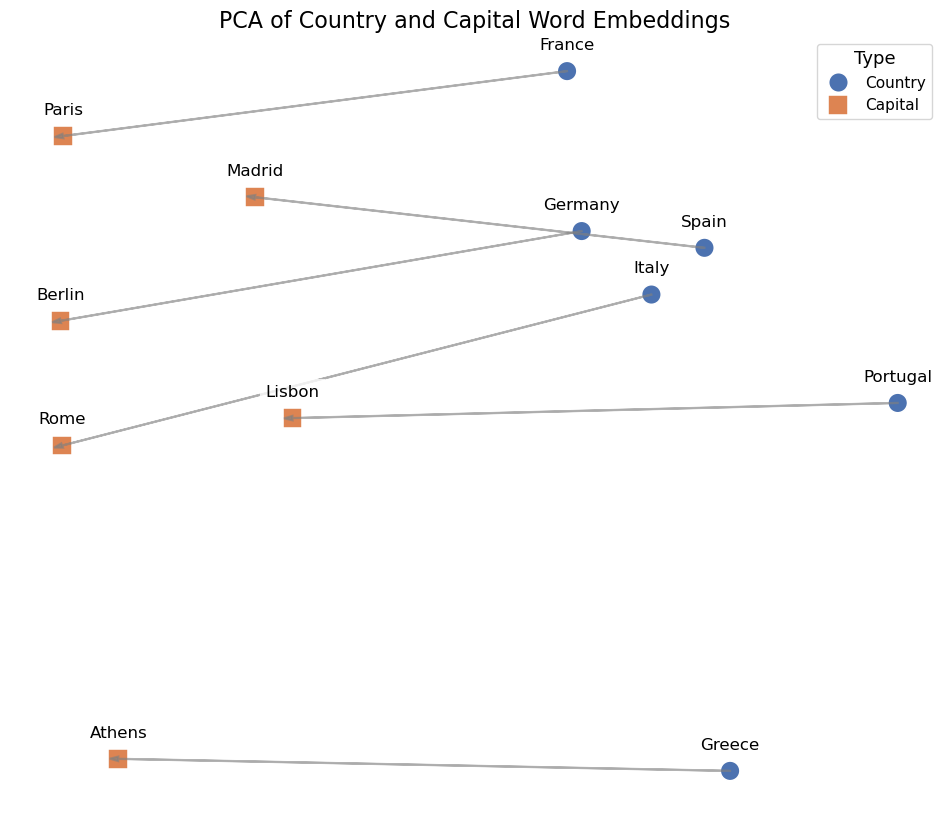

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

countries = ['Germany', 'France', 'Italy', 'Spain', 'Portugal', 'Greece']
capital_words = ['Berlin', 'Paris', 'Rome', 'Madrid', 'Lisbon', 'Athens']

# Get the word embeddings for the countries and capitals
country_embeddings = np.array([model[country] for country in countries])
capital_embeddings = np.array([model[capital] for capital in capital_words])

# Compute the PCA
pca = PCA(n_components=2)
embeddings = np.vstack([country_embeddings, capital_embeddings])
embeddings_pca = pca.fit_transform(embeddings)

# Create a DataFrame for seaborn
df = pd.DataFrame(embeddings_pca, columns=['PC1', 'PC2'])
df['Label'] = countries + capital_words
df['Type'] = ['Country'] * len(countries) + ['Capital'] * len(capital_words)

# Plot the data
plt.figure(figsize=(12, 10))

# Create a scatter plot with seaborn
scatter_plot = sns.scatterplot(data=df, x='PC1', y='PC2', hue='Type', style='Type', s=200, palette='deep', markers=['o', 's'])

# Annotate the points
for i in range(len(df)):
    plt.text(df['PC1'][i], df['PC2'][i] + 0.08, df['Label'][i], fontsize=12, ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Draw arrows between countries and capitals
for i in range(len(countries)):
    plt.arrow(df['PC1'][i], df['PC2'][i], df['PC1'][i + len(countries)] - df['PC1'][i], df['PC2'][i + len(countries)] - df['PC2'][i],
              color='gray', alpha=0.6, linewidth=1.5, head_width=0.02, head_length=0.03)

plt.legend(title='Type', title_fontsize='13', fontsize='11')
plt.title('PCA of Country and Capital Word Embeddings', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
ax = plt.gca()
ax.set_axis_off()

We can see that word2vec places the words representing countries close to each other and so do the words representing their capitals. The country-capital relationship is also roughly preserved, e.g., *Germany*-*Berlin* vector is roughly parallel to *France*-*Paris* vector.

```{footbibliography}

```